# Ingestion and Transformation

Use the data from MongoDB sample: sample_supplies
- Export sales in json format: ``` mongoexport --uri="mongodb+srv://<username>:<password>@<cluster>/sample_supplies" --collection="sales" --out=sales.json ```
- Create dataframe from "sales.json"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("sales.json")
df

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,{'$oid': '5bd761dcae323e45a93ccfe8'},{'$date': '2015-03-23T21:06:49.506Z'},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online
1,{'$oid': '5bd761dcae323e45a93ccfe9'},{'$date': '2015-08-25T10:01:02.918Z'},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone
2,{'$oid': '5bd761dcae323e45a93ccfea'},{'$date': '2017-06-22T09:54:14.185Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 51, 'email': 'worbiduh@...",False,In store
3,{'$oid': '5bd761dcae323e45a93ccfeb'},{'$date': '2015-02-23T09:53:59.343Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': 45, 'email': 'vatires@t...",False,In store
4,{'$oid': '5bd761dcae323e45a93ccfec'},{'$date': '2017-12-03T18:39:48.253Z'},"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': 40, 'email': 'dotzu@ib....",False,In store
...,...,...,...,...,...,...,...
4995,{'$oid': '5bd761deae323e45a93ce36b'},{'$date': '2016-01-20T17:29:10.225Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Austin,"{'gender': 'F', 'age': 45, 'email': 'du@rum.py...",False,In store
4996,{'$oid': '5bd761deae323e45a93ce36c'},{'$date': '2014-11-29T10:09:41.573Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'F', 'age': 47, 'email': 'dup@katje...",False,In store
4997,{'$oid': '5bd761deae323e45a93ce36d'},{'$date': '2017-12-25T07:02:51.283Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,"{'gender': 'M', 'age': 29, 'email': 'losuhse@e...",False,In store
4998,{'$oid': '5bd761deae323e45a93ce36e'},{'$date': '2013-12-07T11:06:25.51Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 59, 'email': 'hu@pehabu...",False,Online


### Data preprocessing

1. Extract the 'oid' field from the '_id' column to make it more readable.

2. Convert the 'saleDate' column to a datetime format using the 'ISO8601' format.

3. Apply the "explode" operation on the 'items' column, breaking it down into individual rows for each item.

4. Use `pd.json_normalize` to extract and flatten the 'customer' and 'items' columns.

5. Convert the 'items_price.$numberDecimal' column to a numeric data type.



In [2]:
# Get ID from object id
df['_id'] = df['_id'].str.get('$oid') 

# Get sale date in DateTime Type
df['saleDate'] = pd.to_datetime(df['saleDate'].str['$date'], format='ISO8601') 

# Break array into individual row for each items
df = df.explode('items').reset_index() 

# Extract item into many collumn
df = df.join(pd.json_normalize(df['items']).add_prefix('items_'))

# Extract customer into many collumn
df = df.join(pd.json_normalize(df['customer']).add_prefix('customer_')) 

# Convert itemsprice.$numberDecimal to number
df['items_price.$numberDecimal'] = pd.to_numeric(df['items_price.$numberDecimal'])
df

,index,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod,items_name,items_tags,items_quantity,items_price.$numberDecimal,customer_gender,customer_age,customer_email,customer_satisfaction
0,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'printer paper', 'tags': ['office', '...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,printer paper,"[office, stationary]",2,40.01,M,42,cauho@witwuta.sv,4
1,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'notepad', 'tags': ['office', 'writin...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,notepad,"[office, writing, school]",2,35.29,M,42,cauho@witwuta.sv,4
2,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'pens', 'tags': ['writing', 'office',...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,pens,"[writing, office, school, stationary]",5,56.12,M,42,cauho@witwuta.sv,4
3,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'backpack', 'tags': ['school', 'trave...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,backpack,"[school, travel, kids]",2,77.71,M,42,cauho@witwuta.sv,4
4,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'notepad', 'tags': ['office', 'writin...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,notepad,"[office, writing, school]",2,18.47,M,42,cauho@witwuta.sv,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'envelopes', 'tags': ['stationary', '...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,envelopes,"[stationary, office, general]",5,24.12,M,33,lihzodud@voblep.ie,3
27434,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'pens', 'tags': ['writing', 'office',...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,pens,"[writing, office, school, stationary]",4,27.10,M,33,lihzodud@voblep.ie,3
27435,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'binder', 'tags': ['school', 'general...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,binder,"[school, general, organization]",3,29.09,M,33,lihzodud@voblep.ie,3
27436,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'laptop', 'tags': ['electronics', 'sc...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,laptop,"[electronics, school, office]",2,598.79,M,33,lihzodud@voblep.ie,3


### Calculating Total Sales in Each Purchase
- Multiplying the price and quantity of each item
- Store the sales into new collumn

In [3]:
# Calculate total_sales in each purchase
df['sales'] = df['items_price.$numberDecimal'] * df['items_quantity']
df

,index,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod,items_name,items_tags,items_quantity,items_price.$numberDecimal,customer_gender,customer_age,customer_email,customer_satisfaction,sales
0,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'printer paper', 'tags': ['office', '...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,printer paper,"[office, stationary]",2,40.01,M,42,cauho@witwuta.sv,4,80.02
1,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'notepad', 'tags': ['office', 'writin...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,notepad,"[office, writing, school]",2,35.29,M,42,cauho@witwuta.sv,4,70.58
2,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'pens', 'tags': ['writing', 'office',...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,pens,"[writing, office, school, stationary]",5,56.12,M,42,cauho@witwuta.sv,4,280.60
3,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'backpack', 'tags': ['school', 'trave...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,backpack,"[school, travel, kids]",2,77.71,M,42,cauho@witwuta.sv,4,155.42
4,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506000+00:00,"{'name': 'notepad', 'tags': ['office', 'writin...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,notepad,"[office, writing, school]",2,18.47,M,42,cauho@witwuta.sv,4,36.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'envelopes', 'tags': ['stationary', '...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,envelopes,"[stationary, office, general]",5,24.12,M,33,lihzodud@voblep.ie,3,120.60
27434,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'pens', 'tags': ['writing', 'office',...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,pens,"[writing, office, school, stationary]",4,27.10,M,33,lihzodud@voblep.ie,3,108.40
27435,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'binder', 'tags': ['school', 'general...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,binder,"[school, general, organization]",3,29.09,M,33,lihzodud@voblep.ie,3,87.27
27436,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739000+00:00,"{'name': 'laptop', 'tags': ['electronics', 'sc...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,laptop,"[electronics, school, office]",2,598.79,M,33,lihzodud@voblep.ie,3,1197.58


# Queries & Result

## Top 10 items sales

In [4]:
df.groupby("items_name").sales.agg("sum").sort_values(ascending=False)

items_name
laptop           6775977.07
backpack          817374.10
pens              581843.27
binder            511644.57
notepad           463615.48
envelopes         376658.49
printer paper     367459.29
Name: sales, dtype: float64

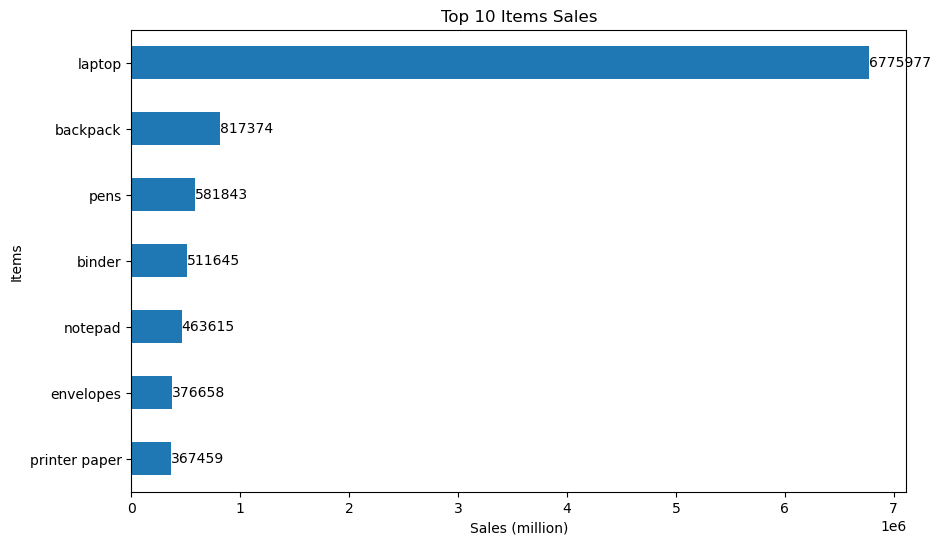

In [5]:
topItemSales = df.groupby("items_name").sales.agg("sum").sort_values()
topItemSalesChart = topItemSales.plot(kind='barh', 
                                      title='Top 10 Items Sales', 
                                      ylabel='Items', 
                                      xlabel='Sales (million)', 
                                      figsize=(10, 6),)
for i, v in enumerate(topItemSales):
    topItemSalesChart.text(v, i, f'{v:.0f}', color='black', va='center')

## Top 3 sales in each store location

In [6]:
top3 = df.groupby(['storeLocation', 'items_name']).sales.agg("sum").groupby('storeLocation', group_keys=False).nlargest(3)
top3

storeLocation  items_name
Austin         laptop        1018494.05
               backpack       115217.59
               pens            74622.52
Denver         laptop        1961659.25
               backpack       245679.34
               pens           185008.39
London         laptop        1073098.72
               backpack       144529.14
               pens            92602.30
New York       laptop         694613.32
               backpack        82563.14
               pens            64029.90
San Diego      laptop         462973.58
               backpack        50997.42
               pens            42134.55
Seattle        laptop        1565138.15
               backpack       178387.47
               pens           123445.61
Name: sales, dtype: float64

<Axes: title={'center': 'Top 3 Items Sales by Store Location'}, xlabel='Location', ylabel='Sales (million)'>

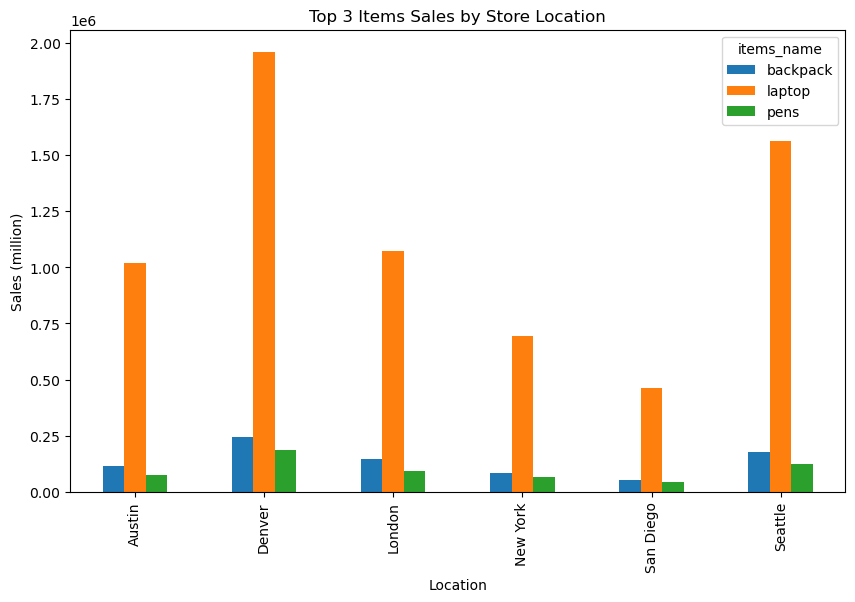

In [7]:
top3Pivot = top3.unstack(level=1)

top3Pivot.plot(kind='bar',
                title='Top 3 Items Sales by Store Location', 
                ylabel='Sales (million)',
                xlabel='Location', 
                stacked=False,
                figsize=(10, 6))

## Rank of store location

In [8]:
df.groupby(['storeLocation']).sales.agg("sum").sort_values(ascending=False)

storeLocation
Denver       2921009.92
Seattle      2255947.69
London       1583066.79
Austin       1445603.11
New York     1016059.59
San Diego     672885.17
Name: sales, dtype: float64

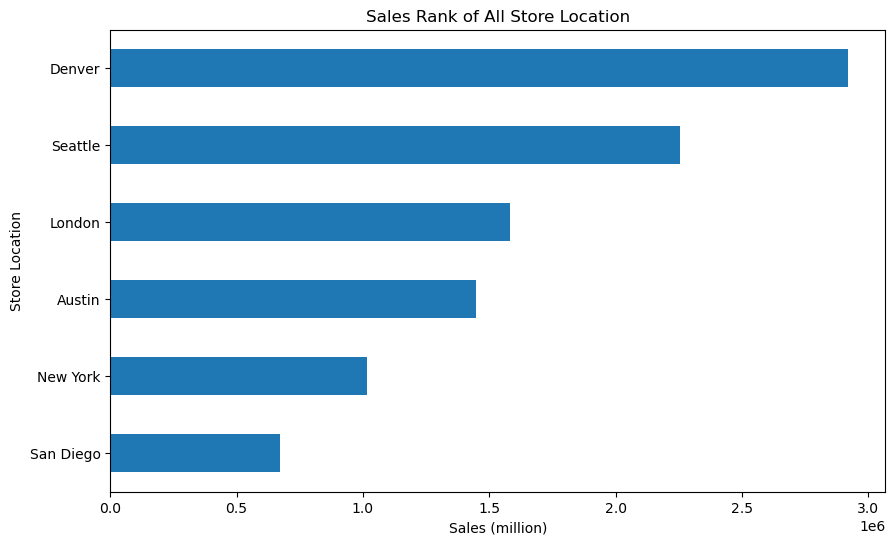

In [9]:
topItemSalesChart = df.groupby(['storeLocation']).sales.agg("sum").sort_values().plot(kind='barh', 
                                      title='Sales Rank of All Store Location', 
                                      ylabel='Store Location', 
                                      xlabel='Sales (million)', 
                                      figsize=(10, 6),)

## Purchase method in each gender

In [10]:
gender_method = df.groupby(['customer_gender', 'purchaseMethod']).size().reset_index(name='count')

gender_method_table = gender_method.pivot(index='customer_gender', columns='purchaseMethod', values='count')

# gender_method_table['Online/Phone'] = gender_method_table['Online'] + gender_method_table['Phone']

gender_method_table

purchaseMethod,In store,Online,Phone
customer_gender,,,
F,8062,4270,1499
M,7571,4314,1722


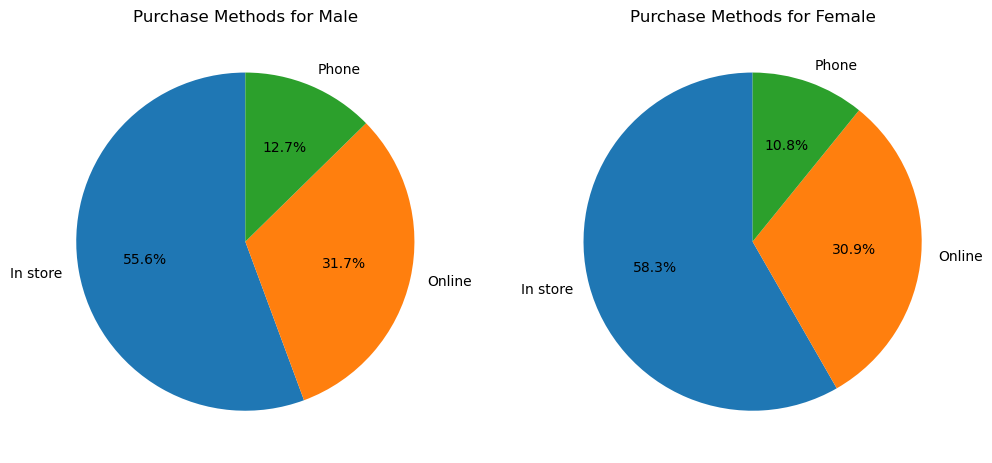

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(gender_method_table.loc['M'], labels=gender_method_table.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Purchase Methods for Male')

axes[1].pie(gender_method_table.loc['F'], labels=gender_method_table.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Purchase Methods for Female')

plt.show()

## Monthly Sales

In [12]:
df.groupby([df.saleDate.dt.month, df.saleDate.dt.strftime('%B')]).sales.agg("sum").rename_axis(['Month No.', 'Month'])

Month No.  Month    
1          January      918041.47
2          February     733884.21
3          March        867736.82
4          April        756559.46
5          May          878892.77
6          June         769416.01
7          July         847051.30
8          August       791577.12
9          September    758566.50
10         October      841007.09
11         November     860402.92
12         December     871436.60
Name: sales, dtype: float64

<Axes: title={'center': 'Monthly Sales (Order by Sales)'}, xlabel='Sales', ylabel='Month'>

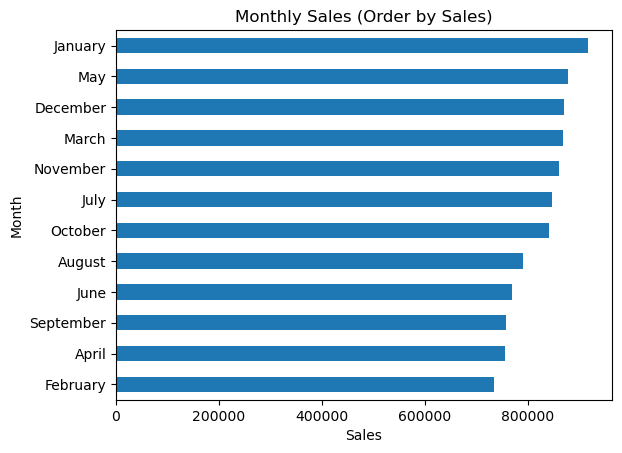

In [13]:
df.groupby([df.saleDate.dt.strftime('%B')]).sales.agg("sum").sort_values().plot(kind='barh',
                                                                                title='Monthly Sales (Order by Sales)',
                                                                                ylabel='Month',
                                                                                xlabel='Sales')

<Axes: title={'center': 'Monthly Sales (Order By Month)'}, xlabel='Sales', ylabel='Month'>

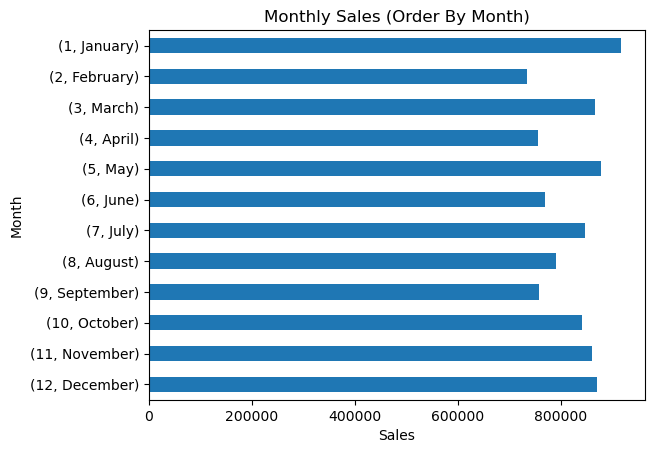

In [14]:
df.groupby([df.saleDate.dt.month, df.saleDate.dt.strftime('%B')]).sales.agg("sum").sort_index(ascending=False).rename_axis(['Month No.', 'Month']).plot(kind='barh',
                                                                                title='Monthly Sales (Order By Month)',
                                                                                ylabel='Month',
                                                                                xlabel='Sales')